In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
combined_df = pd.merge(clinical_df, mouse_df,how="left", on=["Mouse ID"] )

#Selecting the 4 drugs we will analyze
combined_df = combined_df[(combined_df["Drug"] == 'Capomulin') |
                          (combined_df["Drug"] == 'Infubinol') |
                          (combined_df["Drug"] == 'Ketapril')  |
                          (combined_df["Drug"] == 'Placebo')   ]


# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
DT = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
# Convert to DataFrame
DT = DT.reset_index()
# Preview DataFrame
DT.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# Convert to DataFrame
# Preview DataFrame
standard_errors = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
standard_errors = standard_errors.reset_index()
standard_errors.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [10]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
DT2 = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
DT2 = DT2.unstack(level = 0)
DT2_se = combined_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
DT2_se = DT2_se.unstack(level = 0)
DT2.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


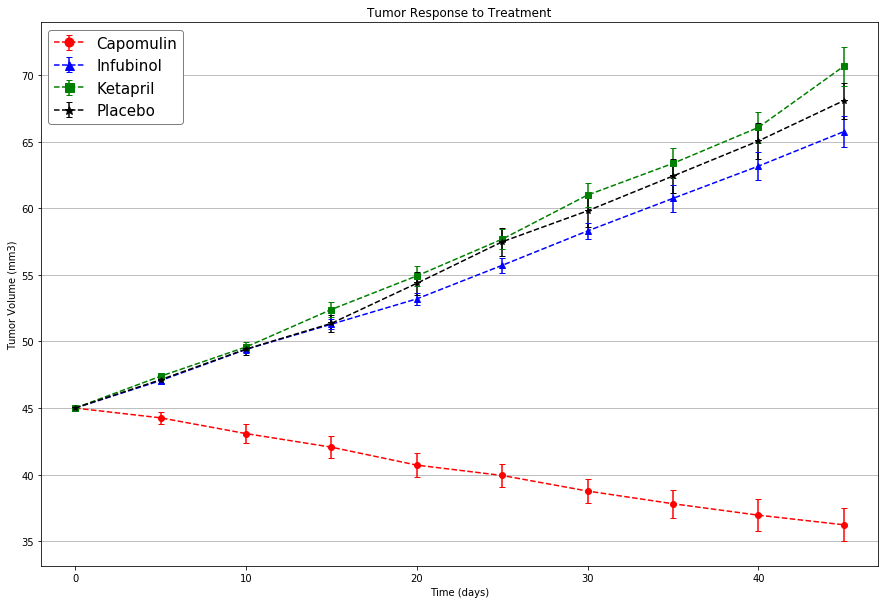

In [37]:
# Generate the Plot (with Error Bars)
Time = DT["Timepoint"].unique()
plt.figure(figsize = (15,10))
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(-2,47)
plt.grid(axis='y')
markers = ['o', '^', 's', '*']
colors = ["red", "blue", "green", "black"]
count = 0

for col in DT2.columns:
    plt.errorbar(Time, 
                 DT2[col], 
                 DT2_se[col], 
                 linestyle = '--', 
                 marker =  markers[count],
                 color = colors[count],
                 capthick = 1, #for caps on error bars 
                 capsize = 3)  # for caps on error bars
    count += 1
  

labels = DT2.columns.values
plt.legend(labels, 
           loc="upper left",
           frameon = True, 
           markerscale = 1.5, 
           edgecolor = 'gray', 
           fontsize = '15', 
           framealpha = 1)


# Save the Figure
plt.savefig("data/Tumor_response_to_treatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [28]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
DT3 = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
# Convert to DataFrame
# DT3 = DT3.reset_index() 
# Preview DataFrame
DT3.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.160000
           10           0.320000
           15           0.375000
           20           0.652174
Name: Metastatic Sites, dtype: float64

In [6]:
## ?? ##

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [29]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
DT3_se = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
# Convert to DataFrame
#DT3_se = DT3_se.reset_index()
# Preview DataFrame
DT3_se.head()

Drug       Timepoint
Capomulin  0            0.000000
           5            0.074833
           10           0.125433
           15           0.132048
           20           0.161621
Name: Metastatic Sites, dtype: float64

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [30]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
DT3 = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()
DT3 = DT3.unstack(level = 0)
DT3_se = combined_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
DT3_se = DT3_se.unstack(level = 0)
DT3.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


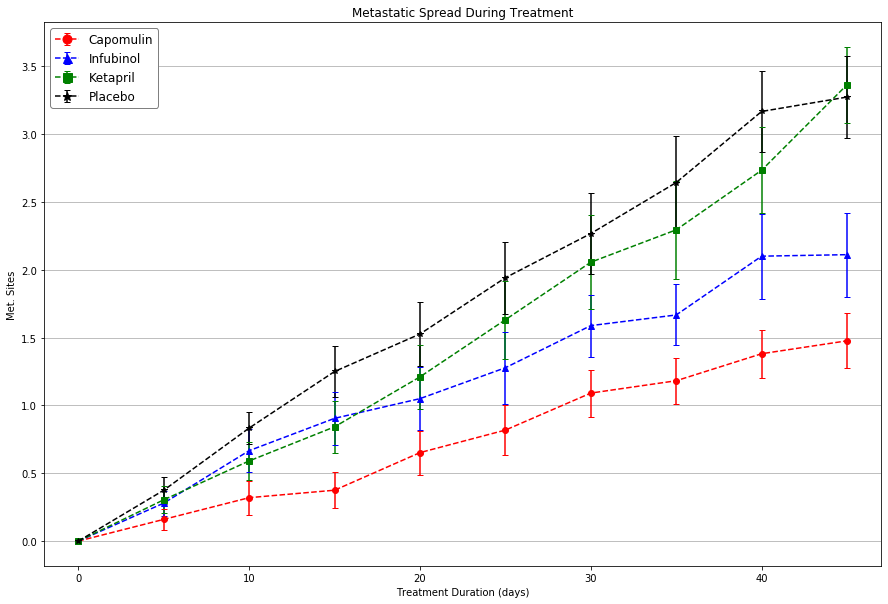

In [41]:
# Generate the Plot (with Error Bars)
Time = DT["Timepoint"].unique()
plt.figure(figsize = (15,10))
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (days)")
plt.ylabel("Met. Sites")
plt.xlim(-2,47)
plt.grid(axis='y')

markers = ['o', '^', 's', '*']
colors = ["red", "blue", "green", "black"]

#creates plot for each treatment, using different markers for each

count = 0 

for col2 in DT3:
    plt.errorbar(Time, 
                 DT3[col2], 
                 DT3_se[col2], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 color = colors[count],
                 capthick = 1, 
                 capsize = 3)
    count += 1


labels = DT3.columns.values
plt.legend(labels, 
           loc="upper left",
           frameon = True, 
           markerscale = 1.5, 
           edgecolor = 'gray', 
           fontsize = '12', 
           framealpha = 1)

# Save the Figure
plt.savefig("data/Metastatic_spread_during_treatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [38]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
# Convert to DataFrame
# Preview DataFrame
SR = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
SR = SR.reset_index()
SR.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [39]:
# Minor Data Munging to Re-Format the Data Frames
# Preview the Data Frame
SR = combined_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
SR = SR.unstack(level = 0)
SR.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,25,25,25,25
5,25,25,23,24
10,25,21,22,24
15,24,21,19,20
20,23,20,19,19


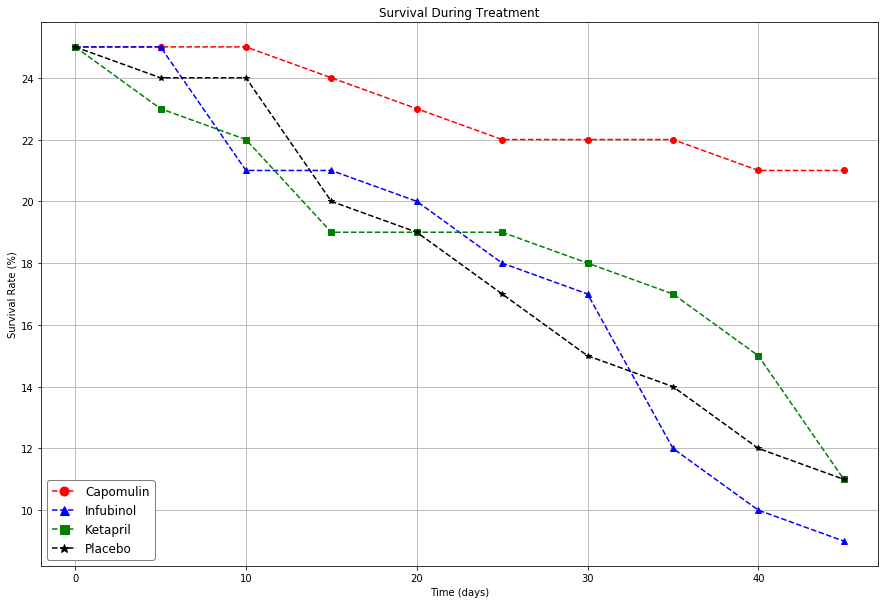

In [44]:
# Generate the Plot (Accounting for percentages)
plt.figure(figsize = (15,10))
plt.title("Survival During Treatment")
plt.xlabel("Time (days)")
plt.ylabel("Survival Rate (%)")
plt.xlim(-2,47)
plt.grid()

markers = ['o', '^', 's', '*']
colors = ["red", "blue", "green", "black"]

#creates plot for each treatment, using different markers for each

count = 0 

for col_sr in SR:
    plt.errorbar(Time, 
                 SR[col_sr], 
                 linestyle = '--', 
                 marker =  markers[count], 
                 color = colors[count],
                 capthick = 1, 
                 capsize = 3)
    count += 1


labels = SR.columns.values
plt.legend(labels, 
           loc="lower left",
           frameon = True, 
           markerscale = 1.5, 
           edgecolor = 'gray', 
           fontsize = '12', 
           framealpha = 1)

# Save the Figure
plt.savefig("data/Survival_during_treatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [46]:
# Calculate the percent changes for each drug
Perc_chg = (DT2.loc[45,:] - DT2.loc[0,:])/ DT2.loc[0,:] *100
# Display the data to confirm
Perc_chg.head()

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
dtype: float64

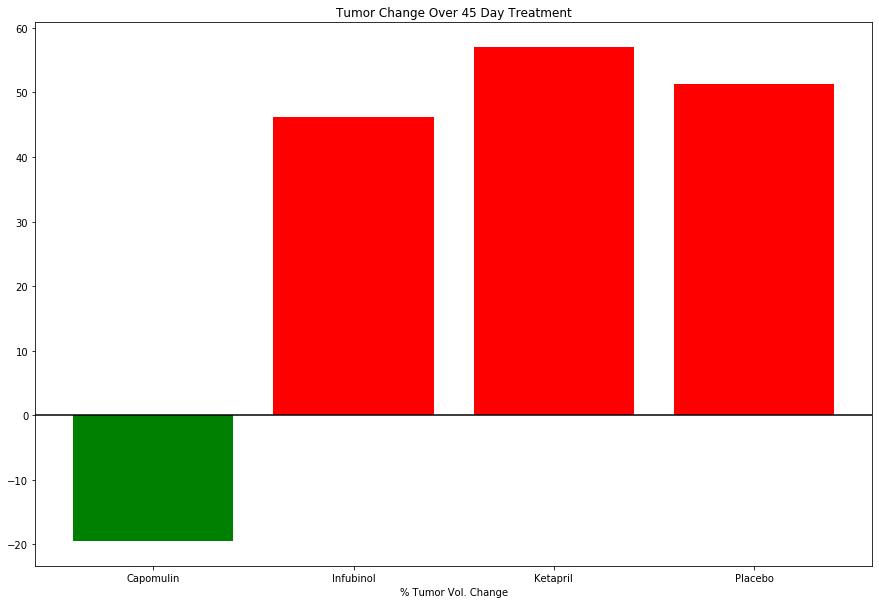

In [68]:
# Store all Relevant Percent Changes into a Tuple
RPC = []
for value in Perc_chg:
    RPC.append(value)

# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 
plt.figure(figsize = (15,10))
plt.title("Tumor Change Over 45 Day Treatment")
plt.xlabel("% Tumor Vol. Change")
plt.axhline(y=0, color = 'black') 
xlabels = Perc_chg.index

# Use functions to label the percentages of changes
plt.xticks(np.arange(len(xlabels)), xlabels)

# Call functions to implement the function calls
plt.bar(np.arange(4), 
        RPC, 
        color = ['red' if RPC[x] > 0 else 'green' for x in range(4)]
        )

# Save the Figure
plt.savefig("data/Tumor Change Over 45 Day Treatment.png")


# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/change.png)